In [25]:
import numpy as np
import math
import random as rnd
import matplotlib.pyplot as plt

In [26]:
def ClosestPair(P,Q):
        
    if len(P) <= 3:
        bruteSearch(P,Q)
        return bruteSearch(P,Q)
        
    else:
        temp = int(len(P)/2)
        
        Pl = P[0: temp] # slicing by half
        Ql = Q[0: temp] # size of Pi = Qi
        Pr = P[temp:]
        Qr = Q[temp:]
        
        #recurrsive formula
        dl = ClosestPair(Pl,Ql)
        dl = float(dl)
        dr = ClosestPair(Pr,Qr)
        dr = float(dr)
        d = min(dl,dr)
        m = P[temp-1]
        S = []
        for i in range(len(P)):
            if abs(P[i]-m) <= d:
                S.append(Q[i])
            
        dminsq = d**2
        
        for i in range(0,len(S)-2):
            k = i + 1
            while k <= (len(S)-1) and (S[k]-S[i])**2 < dminsq:
                dminsq = min(((P[k]-P[i])**2 + (S[k]-S[i])**2) , dminsq)
                k = k + 1
                
        return math.sqrt(dminsq)
    

In [27]:
def bruteSearch(P,Q):
    
    #compare every point by brute furce
    minsqlist = []
    
    #add every point distance in list
    for i in range(len(P)-1):
        for k in range(i,len(P)-1):
            dsqr = ((P[k+1]-P[i])**2)+((Q[k+1]-Q[i])**2)  
            minsqlist.append(dsqr)
            
    #sort it using bruteforce listing, and find its min
    minsqlist.sort()
    minsq = minsqlist[0]
    ret = float(math.sqrt(minsq))

    return ret

    

In [34]:
numPnt = 3000


Pnt = np.random.random((numPnt,2))
# P는 x좌표의 오름차순 정렬
Pi = np.sort(Pnt[:,0]) 
# Q는 y좌표의 오름차순 정렬
Qi = np.sort(Pnt[:,1])

In [35]:
Qi

array([8.21917407e-04, 8.95020035e-04, 1.15433902e-03, ...,
       9.99043247e-01, 9.99571220e-01, 9.99581120e-01])

In [36]:
bruteSearch(Pi,Qi)

4.975274393190261e-06

In [37]:
ClosestPair(Pi,Qi)

4.975274393190261e-06

In [38]:
br_times = []
dc_times = []

In [43]:
import time

start = time.clock() 
ClosestPair(Pi,Qi)
#bruteSearch(Pi,Qi)
end = time.clock() 


print(" time consumption: ", end-start) 

br_times.append(end-start) 

 time consumption:  0.02635499999996682


C:\Users\jinde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jinde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [20]:
dc_times

[0.008510999999998603,
 0.04365419999902952,
 0.0952870000022813,
 0.141619999996619,
 0.21370000081602]

In [21]:
br_times

[0.8087629000001471,
 7.824645299999247,
 22.379767500002345,
 44.82082860000082,
 74.72731919999933]

In [16]:
dc_times = [0.008510999999998603,
 0.043654199999029515,
 0.0952870000022813,
 0.141619999996619,
 0.21370000081602]
dc_times2 = []
for i in dc_times:
    dc_times2.append(i*math.log(i))
print(dc_times2)

br_times = [0.8087629000001471,
 7.824645299999247,
 22.379767500002345,
 44.82082860000082,
 74.72731919999933]
br_times2 = []
for i in br_times:
    br_times2.append(i**0.5)
print(br_times2)

[-0.04056679494731626, -0.13670119697006555, -0.22400657681636432, -0.27681156580387256, -0.32977801877285584]
[0.8993124596046399, 2.7972567454560275, 4.730725895674188, 6.6948359651302, 8.644496468852267]


In [22]:
NumofPoint =[1000,3000,5000,7000,9000]
NumofPoint2 = []
NumofPoint3 = []

for i in NumofPoint:
    NumofPoint2.append(i*math.log(i))
print(NumofPoint2)
for i in NumofPoint:
    NumofPoint3.append(i**2)
print(NumofPoint3)

[6907.755278982137, 24019.10270295074, 42585.96595708119, 61975.657996262154, 81944.8187068652]
[1000000, 9000000, 25000000, 49000000, 81000000]


C:\Users\jinde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


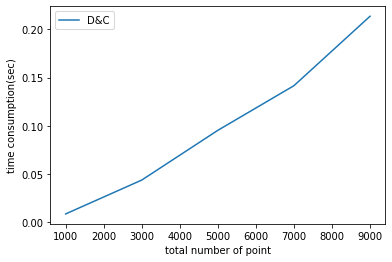

In [19]:
plt.plot(NumofPoint, dc_times)
plt.plot(NumofPoint, br_times)
plt.legend([ 'Dv'])

ax = plt.subplot()



plt.xlabel('total number of point')
plt.ylabel('time consumption(sec)')
plt.show()



C:\Users\jinde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


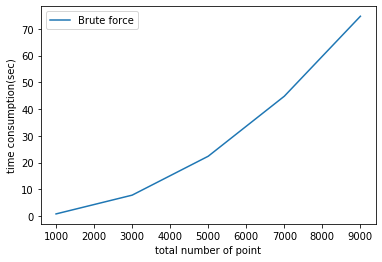

In [490]:
plt.plot(NumofPoint, br_times)

plt.legend(['Brute force'])

ax = plt.subplot()


plt.xlabel('total number of point')
plt.ylabel('time consumption(sec)')
plt.show()



C:\Users\jinde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


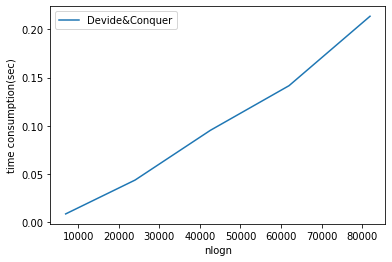

In [23]:
plt.plot(NumofPoint2, dc_times)

plt.legend(['Devide&Conquer'])

ax = plt.subplot()


plt.xlabel('nlogn')
plt.ylabel('time consumption(sec)')
plt.show()



C:\Users\jinde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


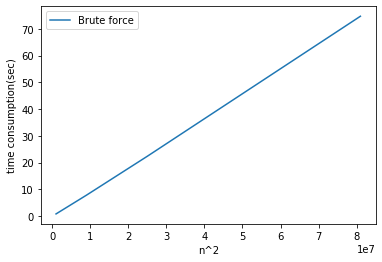

In [28]:
plt.plot(NumofPoint3, br_times)

plt.legend(['Brute force'])

ax = plt.subplot()


plt.xlabel('n^2')
plt.ylabel('time consumption(sec)')
plt.show()


In [9]:
import math
import numpy as np
r= [0,0]
q= [10,0]
p= [5,5]
temp_sqr= (r[0] - p[0])**2 + (r[1] - p[1])**2 - ((q[0]/2 - r[0]/2)**2 + (q[1]/2 - r[1]/2)**2)
temp = np.sqrt(temp_sqr)  #distance of p from q and p added together

In [10]:
temp


5.0